# Final Project
## Data Analysis in Human Resources
Ana André, Data squad #21 | Lisboa, 2019.10.11

## Table of Contents
- [Context](#context)
- [Motivation](#motivation)
- [Dataset](#dataset)
- [Explore the dataset](#explore-dataset)
- [Modeling, prediction and evaluation - Original Data Set](#modeling-original-dataset)
- [Modeling, prediction and evaluation - Resampling the data](#modeling-resampled-dataset)
- [Recursive feature elimination](#RFE)
- [Cross validation](#CV)

<a name="eda"></a>

## Exploratory Data Analysis

### Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

### Load the data

In [3]:
# load the data
data = pd.read_csv('Clean_ds_300.csv', index_col = 0) # cleaned dataset
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,CitizenID,Age,TimeEmployee
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,1,Diversity Job Fair,Fully Meets,2.04,2,6,2019-01-15,1,31,10
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,1,Website Banner Ads,Fully Meets,5.00,4,4,2019-01-17,1,35,5
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,1,Internet Search,Fully Meets,3.90,5,5,2019-01-18,1,33,5
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,1,Pay Per Click - Google,Fully Meets,3.24,3,4,1970-01-01,1,34,0
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,1,Website Banner Ads,Fully Meets,5.00,3,5,2019-01-15,1,31,4


### General Insights

(array([47., 67., 51., 48., 35., 27., 19.,  3.,  4.,  9.]),
 array([27. , 31.1, 35.2, 39.3, 43.4, 47.5, 51.6, 55.7, 59.8, 63.9, 68. ]),
 <a list of 10 Patch objects>)

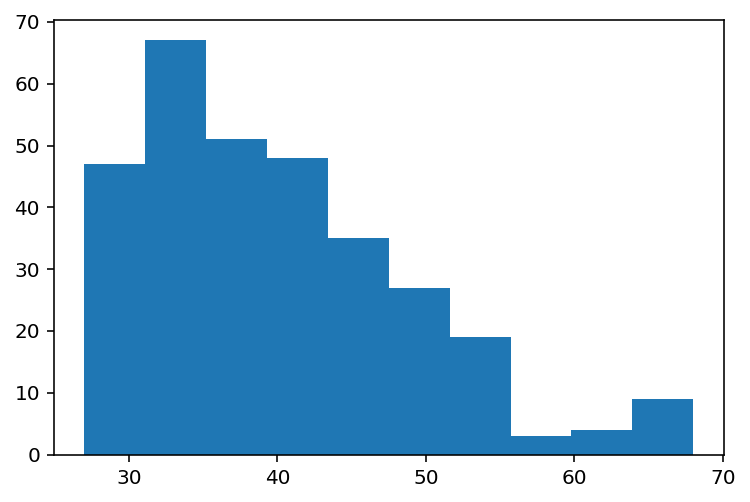

In [4]:
# Distribution of ages
plt.hist(data.Age)
plt.show()

For some reason, I have negative age values, which is clearly wrong.

### Analyzing employee satisfaction

In [5]:
# Scaling EmpSatisfaction column
data_scaled = data.copy()
data_scaled.EmpSatisfaction = data_scaled.EmpSatisfaction / data_scaled.EmpSatisfaction.max()
data_scaled.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,CitizenID,Age,TimeEmployee
0,"Brown, Mia",1103024456,1,1,0,1,1,3,1,28.50,...,1,Diversity Job Fair,Fully Meets,2.04,0.4,6,2019-01-15,1,31,10
1,"LaRotonda, William",1106026572,0,2,1,1,1,3,0,23.00,...,1,Website Banner Ads,Fully Meets,5.00,0.8,4,2019-01-17,1,35,5
2,"Steans, Tyrone",1302053333,0,0,1,1,1,3,0,29.00,...,1,Internet Search,Fully Meets,3.90,1.0,5,2019-01-18,1,33,5
3,"Howard, Estelle",1211050782,1,1,0,1,1,3,0,21.50,...,1,Pay Per Click - Google,Fully Meets,3.24,0.6,4,1970-01-01,1,34,0
4,"Singh, Nan",1307059817,0,0,0,1,1,3,0,16.56,...,1,Website Banner Ads,Fully Meets,5.00,0.6,5,2019-01-15,1,31,4


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d329e9a3c8>)

Text(0.5, 0, 'Employee Satisfaction')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Employees Satisfaction')

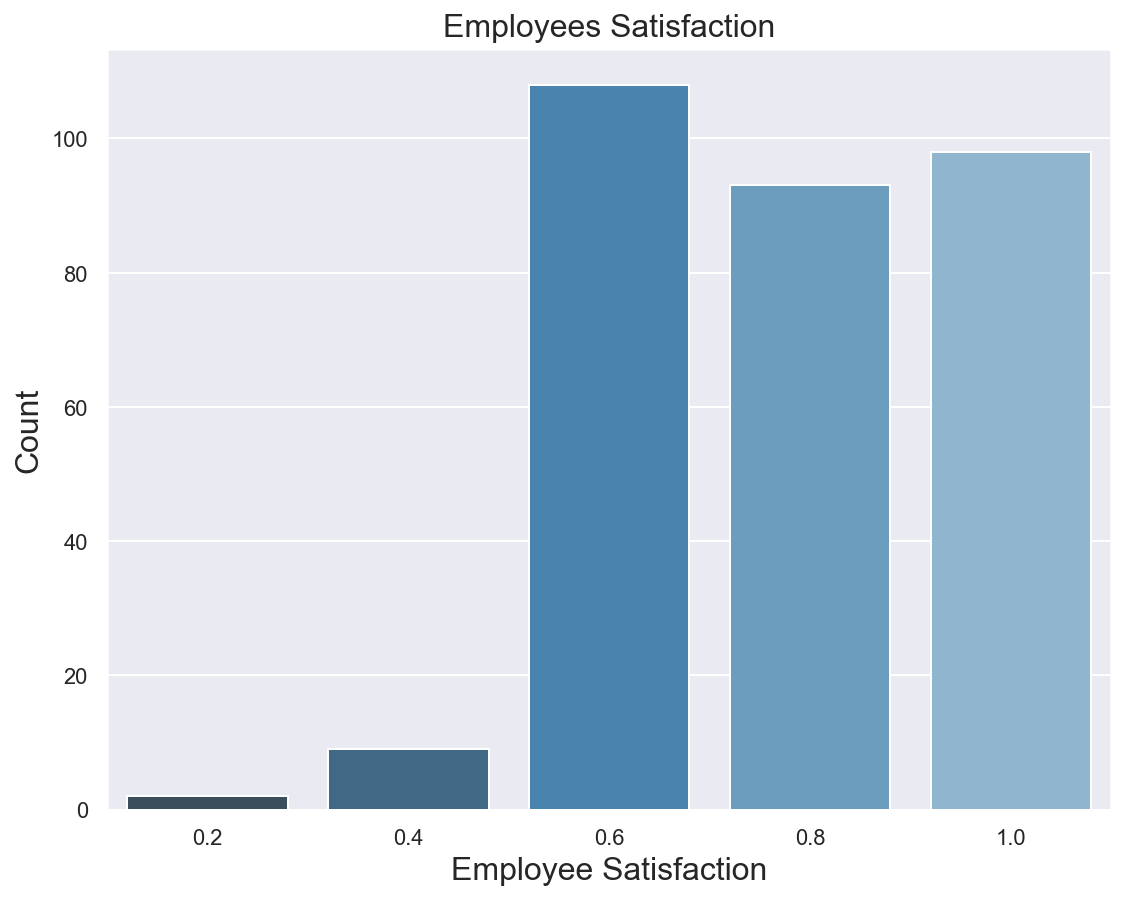

In [6]:
# Employees satisfaction plot
sns.set()
plt.subplots(figsize=(9,7))
sns.barplot(x=data_scaled.EmpSatisfaction.value_counts().index, y=data_scaled.EmpSatisfaction.value_counts().values, palette='Blues_d')
plt.xlabel('Employee Satisfaction', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Employees Satisfaction', fontsize = 16)
plt.show()

In [7]:
emp_quit = data_scaled[data_scaled.EmploymentStatus == 'Voluntarily Terminated']
emp_quit

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,CitizenID,Age,TimeEmployee
5,"Smith, Leigh Ann",711007713,1,1,0,5,1,3,1,20.50,...,1,Diversity Job Fair,Fully Meets,3.80,0.8,4,1970-01-01,1,32,2
6,"Bunbury, Jessica",1504073368,1,1,0,5,6,3,0,55.00,...,17,Social Networks - Facebook Twitter etc,Fully Meets,3.14,1.0,0,1970-01-01,2,55,2
13,"Guilianno, Mike",1001167253,0,0,1,5,6,3,0,55.00,...,17,Newspager/Magazine,Fully Meets,4.50,1.0,0,1970-01-01,1,50,3
46,"Pearson, Randall",1102023965,1,1,1,5,3,3,0,41.00,...,4,Employee Referral,Fully Meets,1.62,0.8,5,1970-01-01,1,35,1
50,"Salter, Jason",1111030148,0,2,1,5,3,3,0,45.00,...,4,Vendor Referral,Fully Meets,2.19,0.6,5,1970-01-01,1,31,0
57,"Ruiz, Ricardo",1001175250,0,2,1,5,3,3,1,21.00,...,5,Diversity Job Fair,Fully Meets,2.51,0.8,6,1970-01-01,1,55,3
71,"Tredinnick, Neville",1104025466,1,1,1,5,3,3,0,28.00,...,7,Monster.com,Fully Meets,5.00,0.6,5,1970-01-01,1,31,0
75,"Bozzi, Charles",1303054580,0,0,1,5,5,3,0,50.50,...,2,Billboard,Fully Meets,3.39,0.6,0,1970-01-01,1,49,0
80,"Immediato, Walter",1403065874,1,1,1,5,5,2,0,42.00,...,2,Other,Needs Improvement,2.34,0.4,0,1970-01-01,1,42,1
83,"Peterson, Ebonee",1402065355,1,1,0,5,5,3,0,38.50,...,2,Internet Search,Fully Meets,4.16,1.0,0,1970-01-01,1,42,5


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d329cb0208>)

Text(0.5, 0, 'Employee Satisfaction')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Satisfaction in Employees that Voluntarily Terminated')

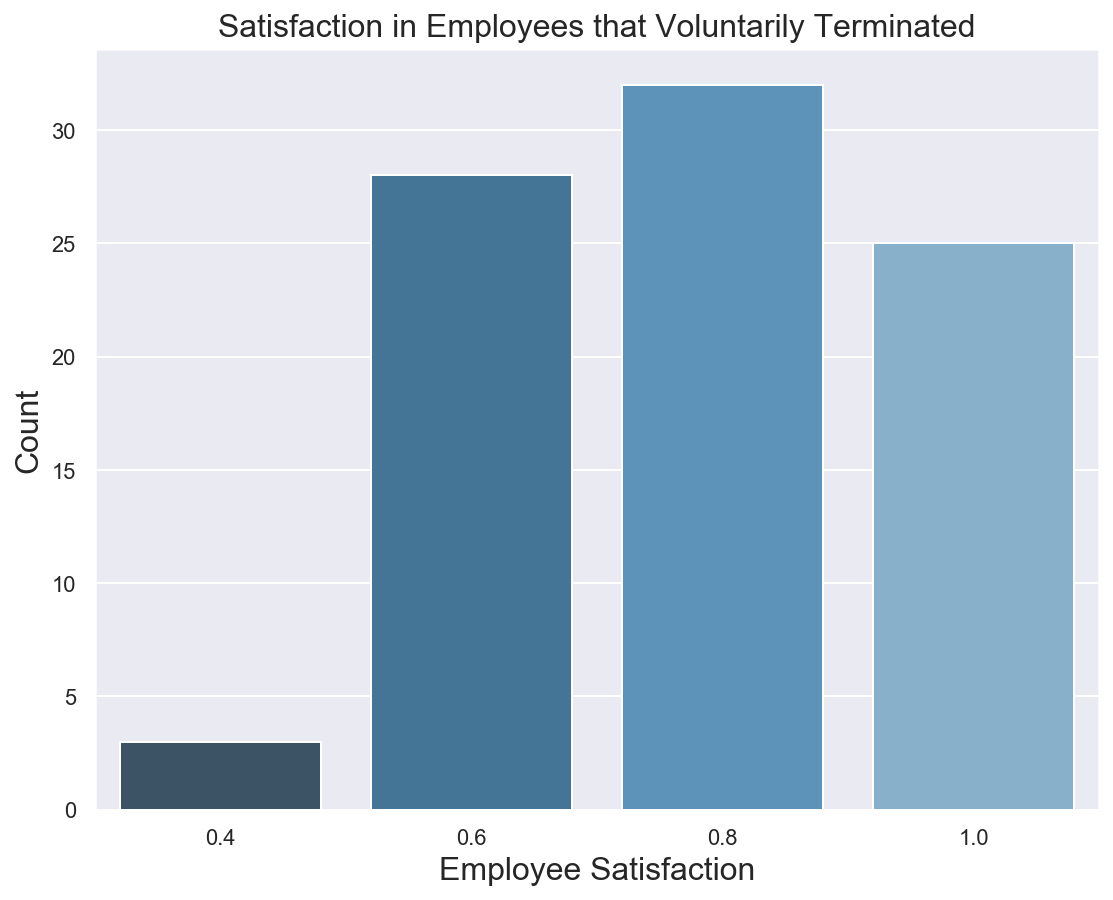

In [8]:
plt.subplots(figsize=(9,7))
sns.barplot(x=emp_quit.EmpSatisfaction.value_counts().index, y=emp_quit.EmpSatisfaction.value_counts().values, palette='Blues_d')
plt.xlabel('Employee Satisfaction', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Satisfaction in Employees that Voluntarily Terminated', fontsize = 16)
plt.show()

In [9]:
emp_quit.corr()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Zip,HispanicLatino,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,CitizenID,Age,TimeEmployee
EmpID,1.000000,0.114746,-0.031561,0.095800,NaN,0.246084,0.020416,0.023840,0.043772,NaN,0.134349,-0.032713,0.029793,-0.067409,-0.021464,-0.039662,-0.211541,0.048738,0.139798,-0.213672
MarriedID,0.114746,1.000000,0.011238,0.008406,NaN,-0.123849,-0.051843,0.043033,0.055256,NaN,-0.086004,-0.066305,-0.129904,-0.063159,-0.026839,-0.131290,-0.006652,0.006901,0.032967,-0.069902
MaritalStatusID,-0.031561,0.011238,1.000000,0.010485,NaN,-0.033924,0.117234,-0.121864,-0.192795,NaN,-0.055053,-0.131350,-0.167390,0.033511,0.035720,0.128358,-0.019646,0.123764,0.047965,-0.220575
GenderID,0.095800,0.008406,0.010485,1.000000,NaN,-0.200729,-0.058328,0.075964,0.205152,NaN,-0.049680,0.031397,0.050958,-0.072194,0.011153,-0.086756,0.222612,0.012181,-0.084155,0.031730
EmpStatusID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeptID,0.246084,-0.123849,-0.033924,-0.200729,NaN,1.000000,-0.050624,-0.313114,-0.302860,NaN,0.113630,0.269720,-0.013407,0.398573,-0.010850,0.149992,-0.736653,-0.073713,0.152228,0.019479
PerfScoreID,0.020416,-0.051843,0.117234,-0.058328,NaN,-0.050624,1.000000,-0.015445,0.028142,NaN,0.011061,0.005962,0.103609,0.057625,-0.146937,0.322287,0.070673,0.006605,0.100314,-0.053522
FromDiversityJobFairID,0.023840,0.043033,-0.121864,0.075964,NaN,-0.313114,-0.015445,1.000000,-0.007980,NaN,-0.036779,-0.092584,0.260875,0.004826,-0.171299,-0.047082,0.166609,-0.133631,0.141868,0.072194
PayRate,0.043772,0.055256,-0.192795,0.205152,NaN,-0.302860,0.028142,-0.007980,1.000000,NaN,-0.049289,0.478118,-0.015183,-0.432259,-0.113744,-0.044012,0.462107,0.117224,0.022919,-0.044421
Termd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.pairplot()

# Clustering

In [16]:
data_scaled.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'CitizenID',
       'Age', 'TimeEmployee'],
      dtype='object')

In [18]:
data_ml = data_scaled.drop(['Employee_Name','EmpID','RecruitmentSource','LastPerformanceReview_Date','FromDiversityJobFairID','Department','ManagerName','Position','DOB','Sex','MaritalDesc', 'CitizenDesc','RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus','PerformanceScore','State', 'Zip'],
                           axis = 1)
data_ml.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,PayRate,Termd,PositionID,HispanicLatino,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,CitizenID,Age,TimeEmployee
0,1,1,0,1,1,3,28.50,0,1,0,1,2.04,0.4,6,1,31,10
1,0,2,1,1,1,3,23.00,0,1,0,1,5.00,0.8,4,1,35,5
2,0,0,1,1,1,3,29.00,0,1,0,1,3.90,1.0,5,1,33,5
3,1,1,0,1,1,3,21.50,1,2,0,1,3.24,0.6,4,1,34,0
4,0,0,0,1,1,3,16.56,0,2,0,1,5.00,0.6,5,1,31,4


In [19]:
data_ml.dtypes

MarriedID                 int64
MaritalStatusID           int64
GenderID                  int64
EmpStatusID               int64
DeptID                    int64
PerfScoreID               int64
PayRate                 float64
Termd                     int64
PositionID                int64
HispanicLatino            int64
ManagerID                 int64
EngagementSurvey        float64
EmpSatisfaction         float64
SpecialProjectsCount      int64
CitizenID                 int64
Age                       int64
TimeEmployee              int64
dtype: object

## Dimensionality Reduction

In [20]:
# Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

In [22]:
# Standardize the feature matrix
features = StandardScaler().fit_transform(data_ml)

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 17
Reduced number of features: 15


In [27]:
type(features_pca)

numpy.ndarray

In [32]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
n_pcs = pca.components.shape[0]

most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['a','b','c','d','e']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

AttributeError: 'PCA' object has no attribute 'components'

In [34]:
data_reduced = pd.DataFrame(pca.components_, columns = data_ml.columns)
data_reduced.head()

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,PayRate,Termd,PositionID,HispanicLatino,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,CitizenID,Age,TimeEmployee
0,0.019307,-0.086057,0.081801,-0.380741,-0.384620,0.074412,0.363899,-0.359536,-0.223930,0.040692,-0.400150,-0.004711,0.005048,0.445594,0.046897,-0.105462,0.039541
1,0.268615,0.158955,0.026066,0.506751,-0.418924,-0.060702,0.056304,0.496262,0.132170,-0.056216,-0.219156,-0.004977,-0.084703,0.347646,0.015087,0.049587,-0.130667
2,0.081468,-0.125907,0.300800,0.017588,0.101209,-0.573283,0.137320,0.104138,-0.271741,0.156407,0.038588,-0.033003,-0.537631,-0.066791,0.143246,0.001280,0.321260
3,0.372187,0.226339,-0.187093,-0.226246,-0.020977,-0.261253,-0.246802,-0.307689,0.251213,-0.329974,-0.132413,-0.045040,-0.406460,-0.089006,-0.079002,-0.073997,-0.351252
4,0.278276,0.466604,0.068416,-0.021993,0.171593,0.189501,0.241515,-0.024213,-0.318806,-0.299275,0.023642,0.098035,0.085470,-0.114356,0.417457,0.420222,0.052882
